In [1]:
%matplotlib inline

In [2]:
#Imports

#pandas
import pandas as pd
from pandas import Series,DataFrame

#numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime
import math
from sklearn.preprocessing import LabelEncoder
#machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score



C:\Users\imamk\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\imamk\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
return_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

return_df.head()

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,PF00001002,DSK00001001,OFF00001002,B,20040720,110000000.0,T,0.02074,USD,2.332216,1.098097e+08,20040720,NaN,20040812,B,NaN,NaN,0.02496
1,PF00001003,DSK00001002,OFF00001001,A,20040709,176671000.0,N,0.02074,GBP,5.269617,1.760084e+08,20040723,NaN,20040812,C,NaN,NaN,0.05496
2,PF00001005,DSK00001004,OFF00001001,A,20040723,56474000.0,T,0.02074,USD,2.332216,5.637953e+07,20040723,NaN,20040817,A,NaN,NaN,0.02496
3,PF00001006,DSK00001005,OFF00001001,A,20040609,164813000.0,T,0.02074,USD,2.332216,1.645088e+08,20040723,NaN,20040713,A,NaN,NaN,0.02496
4,PF00001007,DSK00001005,OFF00001002,B,20040609,140800000.0,T,0.02074,USD,2.332216,1.405402e+08,20040723,NaN,20040713,B,NaN,NaN,0.02496


In [4]:
return_df.info()
print("--------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9366 entries, 0 to 9365
Data columns (total 18 columns):
portfolio_id      9366 non-null object
desk_id           5701 non-null object
office_id         9366 non-null object
pf_category       9366 non-null object
start_date        9366 non-null int64
sold              9364 non-null float64
country_code      9366 non-null object
euribor_rate      9366 non-null float64
currency          9366 non-null object
libor_rate        8892 non-null float64
bought            9364 non-null float64
creation_date     9366 non-null int64
indicator_code    3667 non-null object
sell_date         9366 non-null int64
type              9366 non-null object
hedge_value       3665 non-null object
status            6282 non-null object
return            9366 non-null float64
dtypes: float64(5), int64(3), object(10)
memory usage: 1.3+ MB
--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
port

In [5]:
return_df[return_df.sold.isnull()]

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
572,PF00001860,DSK00001794,OFF00001001,A,20070411,NaN,T,0.03864,USD,4.777636,NaN,20070411,NaN,20070514,A,NaN,NaN,0.04632
573,PF00001861,DSK00001795,OFF00001001,A,20070411,NaN,T,0.03864,USD,4.777636,NaN,20070411,NaN,20070514,A,NaN,NaN,0.04632


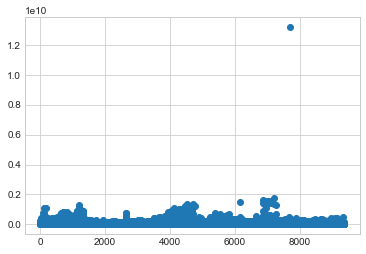

In [6]:
plt.scatter(x=return_df.index,y=return_df.sold)

In [7]:
return_df['sold'].min()

1.1000000000000001

In [8]:
return_df['sold'].max()

13200000000.0

In [9]:
notnullData = return_df[~return_df.sold.isnull()]

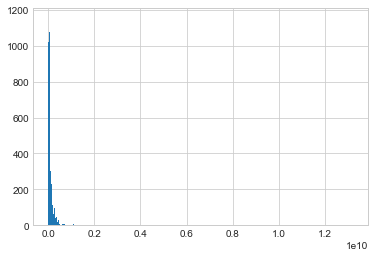

In [10]:
notnullData.sold.hist(bins = 1000)

In [11]:
return_df.sold[return_df.sold.isnull()] = notnullData.sold.median() 

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
return_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9366 entries, 0 to 9365
Data columns (total 18 columns):
portfolio_id      9366 non-null object
desk_id           5701 non-null object
office_id         9366 non-null object
pf_category       9366 non-null object
start_date        9366 non-null int64
sold              9366 non-null float64
country_code      9366 non-null object
euribor_rate      9366 non-null float64
currency          9366 non-null object
libor_rate        8892 non-null float64
bought            9364 non-null float64
creation_date     9366 non-null int64
indicator_code    3667 non-null object
sell_date         9366 non-null int64
type              9366 non-null object
hedge_value       3665 non-null object
status            6282 non-null object
return            9366 non-null float64
dtypes: float64(5), int64(3), object(10)
memory usage: 1.3+ MB


In [13]:
notnullData = return_df[~return_df.libor_rate.isnull()]

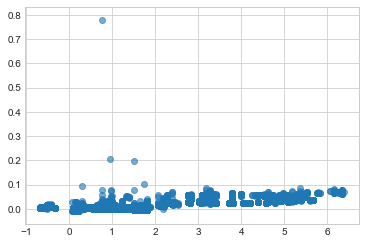

In [14]:
plt.scatter(x=notnullData['libor_rate'],y=notnullData['return'],alpha=0.6)

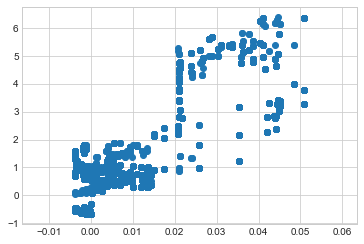

In [15]:
plt.scatter(x = notnullData['euribor_rate'],y= notnullData['libor_rate'],cmap=notnullData.currency)

In [16]:
libor_minus_data =return_df[return_df['libor_rate'].isnull()]

In [17]:
euro_data = return_df[return_df['currency'] == "EUR"]

In [18]:
euro_data.shape

(481, 18)

In [19]:
libor_minus_data.pf_category.unique()

array(['A', 'D', 'E'], dtype=object)

In [20]:
libor_minus_data.currency.unique()

array(['EUR'], dtype=object)

In [21]:
notnullData[notnullData.currency == 'EUR']

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
7762,PF00012796,NaN,OFF00001002,B,20150515,22000000.0,Z,-0.00042,EUR,0.156735,2.195557e+07,20150513,True,20150615,H,False,True,0.02820
7864,PF00012900,NaN,OFF00001002,B,20150615,22000000.0,Z,-0.00057,EUR,0.172437,2.195700e+07,20150611,True,20150715,H,False,True,0.02820
7924,PF00013242,NaN,OFF00001002,B,20150917,22000000.0,Z,-0.00099,EUR,0.141111,2.195395e+07,20150915,True,20151019,H,False,True,0.02832
8008,PF00012910,NaN,OFF00001002,B,20150618,33000000.0,Z,-0.00057,EUR,0.172437,3.293121e+07,20150616,True,20150720,H,False,True,0.02820
8177,PF00013444,NaN,OFF00001002,B,20151119,22000000.0,Z,-0.00119,EUR,0.068843,2.195453e+07,20151117,True,20151221,H,False,True,0.02796
8787,PF00013148,NaN,OFF00001002,B,20150817,22000000.0,Z,-0.00078,EUR,0.151360,2.195557e+07,20150813,True,20150917,H,False,True,0.02820
9242,PF00013033,NaN,OFF00001002,B,20150720,33000000.0,Z,-0.00064,EUR,0.167049,3.293307e+07,20150716,True,20150820,H,False,True,0.02832


In [22]:

def convert_to_date_Object(date_list):
    new_list = []
    for dates in date_list:
        cus_date = datetime.strptime(str(dates), "%Y%m%d").date()
        new_list.append(cus_date)
    return new_list

In [23]:
return_df['start_date'] = convert_to_date_Object(return_df['start_date']) 
test_df['start_date'] = convert_to_date_Object(test_df['start_date'])

return_df['creation_date'] = convert_to_date_Object(return_df['creation_date'])
test_df['creation_date'] =  convert_to_date_Object(test_df['creation_date'])

return_df['sell_date'] = convert_to_date_Object(return_df['sell_date'])
test_df['sell_date'] = convert_to_date_Object(test_df['sell_date'])

In [24]:
return_df.head()

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,PF00001002,DSK00001001,OFF00001002,B,2004-07-20,110000000.0,T,0.02074,USD,2.332216,1.098097e+08,2004-07-20,NaN,2004-08-12,B,NaN,NaN,0.02496
1,PF00001003,DSK00001002,OFF00001001,A,2004-07-09,176671000.0,N,0.02074,GBP,5.269617,1.760084e+08,2004-07-23,NaN,2004-08-12,C,NaN,NaN,0.05496
2,PF00001005,DSK00001004,OFF00001001,A,2004-07-23,56474000.0,T,0.02074,USD,2.332216,5.637953e+07,2004-07-23,NaN,2004-08-17,A,NaN,NaN,0.02496
3,PF00001006,DSK00001005,OFF00001001,A,2004-06-09,164813000.0,T,0.02074,USD,2.332216,1.645088e+08,2004-07-23,NaN,2004-07-13,A,NaN,NaN,0.02496
4,PF00001007,DSK00001005,OFF00001002,B,2004-06-09,140800000.0,T,0.02074,USD,2.332216,1.405402e+08,2004-07-23,NaN,2004-07-13,B,NaN,NaN,0.02496


In [25]:
libor_minus_data = return_df[~return_df.libor_rate.isnull()]

In [26]:
libor_minus_data_grouped = libor_minus_data.groupby('creation_date')['libor_rate'].mean()

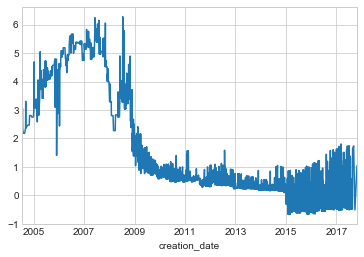

In [27]:
libor_minus_data_grouped.plot()

In [28]:
dates_not_got = return_df[return_df.libor_rate.isnull()].creation_date.unique()

In [29]:
previous_rate = 0.0
for index,row in return_df.iterrows():
    if (math.isnan(row['libor_rate'])):
        if row['creation_date'] in libor_minus_data_grouped.index:
            row['libor_rate'] = libor_minus_data_grouped.get_value(row['creation_date'])
            previous_rate=row['libor_rate']
            return_df.loc[index,'libor_rate'] = row['libor_rate']
        else:
            return_df.loc[index,'libor_rate'] = previous_rate

In [30]:
previous_rate = 0.0
for index,row in test_df.iterrows():
    if (math.isnan(row['libor_rate'])):
        if row['creation_date'] in libor_minus_data_grouped.index:
            row['libor_rate'] = libor_minus_data_grouped.get_value(row['creation_date'])
            previous_rate=row['libor_rate']
            test_df.loc[index,'libor_rate'] = row['libor_rate']
        else:
            test_df.loc[index,'libor_rate'] = previous_rate

In [31]:
return_df.info()
print("-------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9366 entries, 0 to 9365
Data columns (total 18 columns):
portfolio_id      9366 non-null object
desk_id           5701 non-null object
office_id         9366 non-null object
pf_category       9366 non-null object
start_date        9366 non-null object
sold              9366 non-null float64
country_code      9366 non-null object
euribor_rate      9366 non-null float64
currency          9366 non-null object
libor_rate        9366 non-null float64
bought            9364 non-null float64
creation_date     9366 non-null object
indicator_code    3667 non-null object
sell_date         9366 non-null object
type              9366 non-null object
hedge_value       3665 non-null object
status            6282 non-null object
return            9366 non-null float64
dtypes: float64(5), object(13)
memory usage: 1.3+ MB
-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
portfolio_id      

In [32]:
return_df.indicator_code.unique()

array([nan, True], dtype=object)

In [33]:
lb = LabelEncoder()

In [34]:
indi_values = lb.fit_transform(return_df.indicator_code.astype('str'))

(array([ 3667.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  5699.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

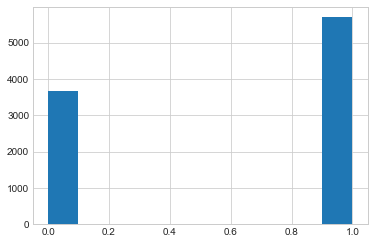

In [35]:
plt.hist(indi_values)


In [36]:
return_df.indicator_code = indi_values

In [37]:
test_df.indicator_code = lb.fit_transform(test_df.indicator_code.astype('str'))

In [38]:
return_df.info()
print("-----------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9366 entries, 0 to 9365
Data columns (total 18 columns):
portfolio_id      9366 non-null object
desk_id           5701 non-null object
office_id         9366 non-null object
pf_category       9366 non-null object
start_date        9366 non-null object
sold              9366 non-null float64
country_code      9366 non-null object
euribor_rate      9366 non-null float64
currency          9366 non-null object
libor_rate        9366 non-null float64
bought            9364 non-null float64
creation_date     9366 non-null object
indicator_code    9366 non-null int64
sell_date         9366 non-null object
type              9366 non-null object
hedge_value       3665 non-null object
status            6282 non-null object
return            9366 non-null float64
dtypes: float64(5), int64(1), object(12)
memory usage: 1.3+ MB
-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
portf

In [39]:
return_df.hedge_value.unique()

array([nan, True, False], dtype=object)

In [40]:
return_df.hedge_value.fillna(False,inplace=True)

In [41]:
test_df.hedge_value.fillna(False,inplace=True)

In [42]:
return_df.hedge_value = lb.fit_transform(return_df.hedge_value.astype('str'))
test_df.hedge_value = lb.fit_transform(test_df.hedge_value.astype('str'))

In [43]:
print("-----------")
test_df.info()

-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
portfolio_id      4801 non-null object
desk_id           2853 non-null object
office_id         4801 non-null object
pf_category       4801 non-null object
start_date        4801 non-null object
sold              4801 non-null float64
country_code      4801 non-null object
euribor_rate      4801 non-null float64
currency          4801 non-null object
libor_rate        4801 non-null float64
bought            4801 non-null float64
creation_date     4801 non-null object
indicator_code    4801 non-null int64
sell_date         4801 non-null object
type              4801 non-null object
hedge_value       4801 non-null int64
status            3344 non-null object
dtypes: float64(4), int64(2), object(11)
memory usage: 637.7+ KB


In [44]:
return_df.status = lb.fit_transform(return_df.status.astype('str'))
test_df.status = lb.fit_transform(test_df.status.astype('str'))

In [45]:
return_df.info()
print("-----------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9366 entries, 0 to 9365
Data columns (total 18 columns):
portfolio_id      9366 non-null object
desk_id           5701 non-null object
office_id         9366 non-null object
pf_category       9366 non-null object
start_date        9366 non-null object
sold              9366 non-null float64
country_code      9366 non-null object
euribor_rate      9366 non-null float64
currency          9366 non-null object
libor_rate        9366 non-null float64
bought            9364 non-null float64
creation_date     9366 non-null object
indicator_code    9366 non-null int64
sell_date         9366 non-null object
type              9366 non-null object
hedge_value       9366 non-null int64
status            9366 non-null int64
return            9366 non-null float64
dtypes: float64(5), int64(3), object(10)
memory usage: 1.3+ MB
-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
portfol

In [46]:
return_df.head()

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,PF00001002,DSK00001001,OFF00001002,B,2004-07-20,110000000.0,T,0.02074,USD,2.332216,1.098097e+08,2004-07-20,1,2004-08-12,B,0,1,0.02496
1,PF00001003,DSK00001002,OFF00001001,A,2004-07-09,176671000.0,N,0.02074,GBP,5.269617,1.760084e+08,2004-07-23,1,2004-08-12,C,0,1,0.05496
2,PF00001005,DSK00001004,OFF00001001,A,2004-07-23,56474000.0,T,0.02074,USD,2.332216,5.637953e+07,2004-07-23,1,2004-08-17,A,0,1,0.02496
3,PF00001006,DSK00001005,OFF00001001,A,2004-06-09,164813000.0,T,0.02074,USD,2.332216,1.645088e+08,2004-07-23,1,2004-07-13,A,0,1,0.02496
4,PF00001007,DSK00001005,OFF00001002,B,2004-06-09,140800000.0,T,0.02074,USD,2.332216,1.405402e+08,2004-07-23,1,2004-07-13,B,0,1,0.02496


In [47]:
return_df['office_id'] = lb.fit_transform(return_df.office_id.astype('str'))
test_df['office_id'] = lb.fit_transform(test_df.office_id.astype('str'))

In [48]:
test_df.office_id.unique()

array([0, 1], dtype=int64)

In [49]:
return_df['pf_category'] = lb.fit_transform(return_df.pf_category.astype('str'))
test_df['pf_category'] = lb.fit_transform(test_df.pf_category.astype('str'))

In [50]:
return_df.pf_category.unique()

array([1, 0, 2, 3, 4], dtype=int64)

In [51]:
return_df.currency.unique()

array(['USD', 'GBP', 'CHF', 'EUR', 'JPY'], dtype=object)

In [52]:
return_df['currency'] = lb.fit_transform(return_df.currency.astype('str'))
test_df['currency'] = lb.fit_transform(test_df.currency.astype('str'))

In [53]:
return_df[return_df['currency'] == 1]

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
2644,PF00005033,DSK00004453,0,0,2010-06-15,8.251100e+07,Z,0.00428,1,1.079023,8.222149e+07,2010-06-15,1,2010-02-05,E,0,1,0.05508
2645,PF00005035,DSK00004455,0,3,2010-06-15,3.465440e+07,Z,0.00428,1,1.079023,3.453281e+07,2010-06-15,1,2010-02-05,E,0,1,0.05508
2646,PF00005036,DSK00004456,0,3,2010-06-15,6.963000e+08,Z,0.00428,1,1.079023,6.939046e+08,2010-06-15,1,2010-03-05,E,0,1,0.05400
2647,PF00005037,DSK00004457,0,3,2010-06-15,3.465000e+07,Z,0.00428,1,1.079023,3.453080e+07,2010-06-15,1,2010-03-05,E,0,1,0.05400
2648,PF00005038,DSK00004459,0,3,2010-06-15,7.316100e+08,Z,0.00428,1,1.079023,7.284458e+08,2010-06-15,1,2010-04-09,E,0,1,0.05436
2649,PF00005039,DSK00004458,0,3,2010-04-16,1.383613e+08,Z,0.00428,1,1.079023,1.378310e+08,2010-06-15,1,2010-04-12,E,0,1,0.05436
2652,PF00005048,DSK00004462,0,3,2010-04-21,1.537426e+08,Z,0.00428,1,1.079023,1.532125e+08,2010-06-15,1,2010-03-12,E,0,1,0.05412
2653,PF00005051,DSK00004465,0,3,2010-06-15,7.311700e+08,Z,0.00428,1,1.079023,7.285210e+08,2010-06-15,1,2010-05-07,E,0,1,0.05688
2654,PF00005053,DSK00004467,0,3,2010-06-15,2.090000e+07,Z,0.00428,1,1.079023,2.081620e+07,2010-06-15,1,2010-05-17,E,0,1,0.05688
2655,PF00005054,DSK00004467,0,3,2010-06-15,2.618000e+08,Z,0.00428,1,1.079023,2.607503e+08,2010-06-15,1,2010-05-17,E,0,1,0.05688


In [54]:
return_df.head()

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
0,PF00001002,DSK00001001,1,1,2004-07-20,110000000.0,T,0.02074,4,2.332216,1.098097e+08,2004-07-20,1,2004-08-12,B,0,1,0.02496
1,PF00001003,DSK00001002,0,0,2004-07-09,176671000.0,N,0.02074,2,5.269617,1.760084e+08,2004-07-23,1,2004-08-12,C,0,1,0.05496
2,PF00001005,DSK00001004,0,0,2004-07-23,56474000.0,T,0.02074,4,2.332216,5.637953e+07,2004-07-23,1,2004-08-17,A,0,1,0.02496
3,PF00001006,DSK00001005,0,0,2004-06-09,164813000.0,T,0.02074,4,2.332216,1.645088e+08,2004-07-23,1,2004-07-13,A,0,1,0.02496
4,PF00001007,DSK00001005,1,1,2004-06-09,140800000.0,T,0.02074,4,2.332216,1.405402e+08,2004-07-23,1,2004-07-13,B,0,1,0.02496


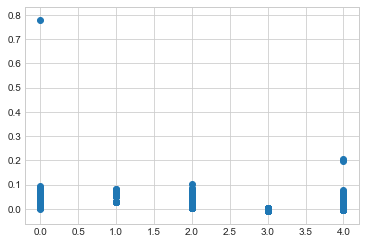

In [55]:
plt.scatter(return_df.currency,return_df['return'])

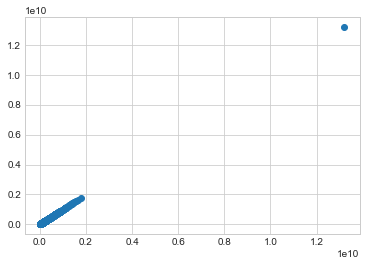

In [56]:
plt.scatter(return_df.bought,return_df.sold)

In [57]:
return_df['type'] = lb.fit_transform(return_df.type.astype('str'))
test_df['type'] = lb.fit_transform(test_df.type.astype('str'))

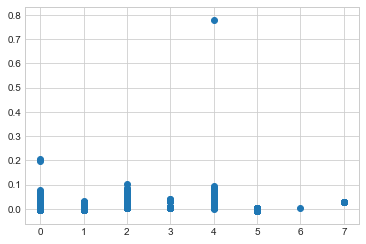

In [58]:
plt.scatter(return_df.type,return_df['return'])

In [59]:
return_df['duration'] = [(date2-date1).days for date1,date2 in zip(return_df.creation_date,return_df.sell_date)]
test_df['duration'] = [(date2-date1).days for date1,date2 in zip(test_df.creation_date,test_df.sell_date)]

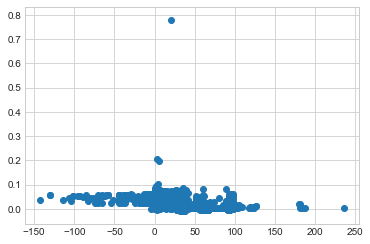

In [60]:
plt.scatter(return_df.duration,return_df['return'])

In [61]:
return_df = return_df[return_df['return'] != return_df['return'].max()]

In [62]:
return_df.head()

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return,duration
0,PF00001002,DSK00001001,1,1,2004-07-20,110000000.0,T,0.02074,4,2.332216,1.098097e+08,2004-07-20,1,2004-08-12,1,0,1,0.02496,23
1,PF00001003,DSK00001002,0,0,2004-07-09,176671000.0,N,0.02074,2,5.269617,1.760084e+08,2004-07-23,1,2004-08-12,2,0,1,0.05496,20
2,PF00001005,DSK00001004,0,0,2004-07-23,56474000.0,T,0.02074,4,2.332216,5.637953e+07,2004-07-23,1,2004-08-17,0,0,1,0.02496,25
3,PF00001006,DSK00001005,0,0,2004-06-09,164813000.0,T,0.02074,4,2.332216,1.645088e+08,2004-07-23,1,2004-07-13,0,0,1,0.02496,-10
4,PF00001007,DSK00001005,1,1,2004-06-09,140800000.0,T,0.02074,4,2.332216,1.405402e+08,2004-07-23,1,2004-07-13,1,0,1,0.02496,-10


In [63]:
euro_train_X = return_df[return_df.currency == 1]
rest_data_X = return_df[~(return_df.currency == 1)]

In [64]:
train_sub_set_X = return_df[['office_id','pf_category','sold','euribor_rate','currency','libor_rate','indicator_code','type','hedge_value','duration']]
train_sub_set_target = return_df[['return']]

In [65]:
euro_sub_set_X = euro_train_X[['office_id','pf_category','sold','euribor_rate','indicator_code','type','duration']]
euro_sub_set_target = euro_train_X[['return']]

In [66]:
rest_data_sub_set_X = rest_data_X[['office_id','pf_category','sold','euribor_rate','currency','libor_rate','indicator_code','type','hedge_value','duration']]
rest_data_sub_set_target = rest_data_X[['return']]

In [67]:
return_df[['return']].values[1666]

array([ 0.0767616])

In [68]:
def normalize_data_frame(df):
    df_norm = (df - df.mean()) / (df.max() - df.min())
    return df_norm

In [69]:
X_normed = normalize_data_frame(train_sub_set_X)
euro_sub_set_X_normed = normalize_data_frame(euro_sub_set_X)
rest_data_sub_set_X_normed = normalize_data_frame(rest_data_sub_set_X)

In [70]:
euro_sub_set_X_normed['duration'] = euro_sub_set_X_normed['duration']**2

In [71]:
rest_data_sub_set_X_normed['duration'] = rest_data_sub_set_X_normed['duration']**2

In [72]:
gradient_euro_x = euro_train_X
gradient_rest_x = rest_data_X

In [73]:
explained_variance = []
for comp in range(2,8):
    pca = PCA(n_components=comp)
    X_pca = pca.fit_transform(X_normed)
    explained_variance.append(pca.explained_variance_ratio_.sum())
    
        

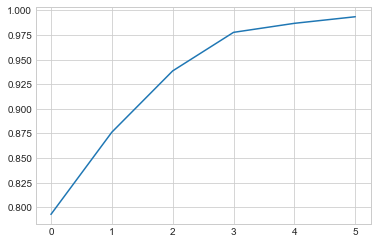

In [74]:
plt.plot(explained_variance)

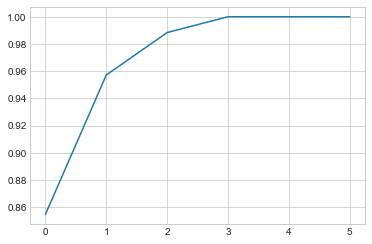

In [75]:
explained_variance1 = []
for comp in range(2,8):
    pca = PCA(n_components=comp)
    euro_pca = pca.fit_transform(euro_sub_set_X_normed)
    explained_variance1.append(pca.explained_variance_ratio_.sum())
    
plt.plot(explained_variance1)

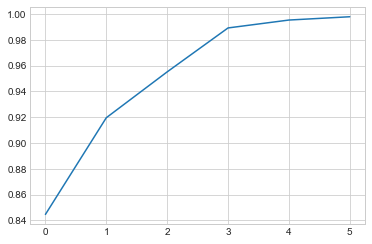

In [76]:
explained_variance1 = []
for comp in range(2,8):
    pca = PCA(n_components=comp)
    rest_data_pca = pca.fit_transform(rest_data_sub_set_X_normed)
    explained_variance1.append(pca.explained_variance_ratio_.sum())
    
plt.plot(explained_variance1)

In [77]:
explained_variance1

[0.8445861489484725,
 0.91956503217201946,
 0.95513306707943513,
 0.98921497340736608,
 0.99533783409206911,
 0.99789955440708622]

In [78]:
#taking 4 as number of principle components
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_normed)
pca = PCA(n_components=2)
euro_X_pca = pca.fit_transform(euro_sub_set_X_normed)
pca = PCA(n_components=3)
rest_X_pca = pca.fit_transform(rest_data_sub_set_X_normed)

In [79]:
lr = LinearRegression()

In [80]:
linear_fit = lr.fit(X_pca,train_sub_set_target)

In [81]:
def get_mean_residual(fit,test_X,test_Y):
    return np.mean((fit.predict(test_X)-test_Y)**2)

In [82]:
get_mean_residual(linear_fit,X_pca,train_sub_set_target)

return    0.000195
dtype: float64

In [83]:
test_df_X = test_df[['office_id','pf_category','sold','euribor_rate','currency','libor_rate','indicator_code','type','hedge_value','duration']]
test_normed = normalize_data_frame(test_df_X)
test_normed['duration'] = test_normed['duration']**2

In [84]:
pca_test = PCA(n_components=4)
test_x_pca = pca_test.fit_transform(test_normed)


In [85]:
return_result = linear_fit.predict(test_x_pca)

In [86]:
return_result

array([[ 0.03140054],
       [ 0.00776938],
       [ 0.03137059],
       ..., 
       [-0.00375564],
       [ 0.00017083],
       [ 0.00017523]])

In [87]:
portfolio_id_test = test_df[['portfolio_id']]

In [88]:
portfolio_id_test['return'] = return_result

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
portfolio_id_test.set_index('portfolio_id',inplace=True)

In [90]:
portfolio_id_test.to_csv("Result.csv")

In [91]:
def cv_optimize(clf,parameters,Xtrain,Ytrain,nfolds,score_func,njobs=1):
    print (njobs)
    if(score_func):
        gs = GridSearchCV(clf,param_grid=parameters,cv=nfolds,n_jobs=njobs,scoring=score_func)
    else:
        gs = GridSearchCV(clf,param_grid=parameters,cv=nfolds,n_jobs=njobs)
    gs.fit(Xtrain,Ytrain)
    print (gs.best_params_,gs.best_score_,gs.grid_scores_)
    best = gs.best_estimator_
    return best,gs.grid_scores_

In [92]:
def do_classify(clf,parameters,indf,featurenames,targetname,mask,njobs = 1,score_func=None,nfolds = 10):
    subdf = indf[featurenames]
    X = subdf.values
    y = indf[targetname].values
    if mask[0]!=None:
        print ("using Mask")
        Xtrain,Ytrain,Xtest,Ytest = X[mask],y[mask],X[~mask],y[~mask]
    else:
        print ("mask not found")
    grid_score = None
    if parameters:
        clf,grid_score = cv_optimize(clf,parameters,Xtrain,Ytrain,njobs=njobs,nfolds = nfolds,score_func = score_func)
    clf_on_train = clf.fit(Xtrain,Ytrain)
    training_accuracy = clf_on_train.score(Xtrain,Ytrain)
    test_accuracy = clf_on_train.score(Xtest,Ytest)
    print (test_accuracy)
    clf_on_total = clf.fit(X,y)
    
    return clf_on_train,grid_score

In [93]:
data_now = X_normed

In [94]:
data_after_pca = pd.DataFrame()
euro_data_after_pca = pd.DataFrame()
rest_data_after_pca = pd.DataFrame()

In [95]:
data_after_pca['c1']= X_pca[:,0]
data_after_pca['c2']= X_pca[:,1]
data_after_pca['c3']= X_pca[:,2]
data_after_pca['c4']= X_pca[:,3]
data_after_pca['return'] = return_df[['return']].values

In [96]:
euro_data_after_pca['c1']= euro_X_pca[:,0]
euro_data_after_pca['c2']= euro_X_pca[:,1]
euro_data_after_pca['return'] = euro_sub_set_target[['return']].values

In [97]:
rest_data_after_pca['c1']= rest_X_pca[:,0]
rest_data_after_pca['c2']= rest_X_pca[:,1]
rest_data_after_pca['c3']= rest_X_pca[:,2]
rest_data_after_pca['return'] = rest_data_sub_set_target[['return']].values

In [98]:
itrain, itest = train_test_split(range(data_after_pca.shape[0]), train_size=0.7)
mask=np.ones(data_after_pca.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [99]:
eurtrain, eurtest = train_test_split(range(euro_data_after_pca.shape[0]),train_size = 0.7)
mask_eur=np.ones(euro_data_after_pca.shape[0], dtype='int')
mask_eur[eurtrain]=1
mask_eur[eurtest]=0
mask_eur = (mask_eur==1)

In [100]:
resttrain, resttest = train_test_split(range(rest_data_after_pca.shape[0]),train_size = 0.7)
mask_rest=np.ones(rest_data_after_pca.shape[0], dtype='int')
mask_rest[resttrain]=1
mask_rest[resttest]=0
mask_rest = (mask_rest==1)

In [101]:
data_after_pca['return'].values[1666]

0.076761600000000013

In [102]:
data_after_pca['return'].values[1]

0.054960000000000002

In [103]:
return_df[['return']].values[1666]

array([ 0.0767616])

In [104]:
return_df[['return']].values[1]

array([ 0.05496])

In [105]:
ridge_model = Ridge()
parameters = { "alpha":[0,0.001,0.01,0.1,0.3,0.5,0.8,0.9,0.99,1.0]}
featurenames = ['c1','c2','c3','c4']
eurfeaturenames = ['c1','c2']
restfeatures = ['c1','c2','c3']

In [106]:
ridge_model_fit,grid_score = do_classify(ridge_model,parameters,data_after_pca,featurenames,'return',mask,njobs=1,nfolds=10)
eur_model_fit,grid_score = do_classify(ridge_model,parameters,euro_data_after_pca,eurfeaturenames,'return',mask_eur,njobs=5)
rest_model_fit,grid_score = do_classify(ridge_model,parameters,rest_data_after_pca,restfeatures,'return',mask_rest,njobs=10)

using Mask
1
{'alpha': 1.0} -1.9549587913508721 [mean: -1.96078, std: 2.10379, params: {'alpha': 0}, mean: -1.96077, std: 2.10379, params: {'alpha': 0.001}, mean: -1.96072, std: 2.10372, params: {'alpha': 0.01}, mean: -1.96019, std: 2.10311, params: {'alpha': 0.1}, mean: -1.95903, std: 2.10174, params: {'alpha': 0.3}, mean: -1.95786, std: 2.10038, params: {'alpha': 0.5}, mean: -1.95612, std: 2.09833, params: {'alpha': 0.8}, mean: -1.95554, std: 2.09765, params: {'alpha': 0.9}, mean: -1.95502, std: 2.09704, params: {'alpha': 0.99}, mean: -1.95496, std: 2.09697, params: {'alpha': 1.0}]
0.447259822863
using Mask
5
{'alpha': 0} -25.2247506574098 [mean: -25.22475, std: 62.71510, params: {'alpha': 0}, mean: -25.22529, std: 62.71697, params: {'alpha': 0.001}, mean: -25.23063, std: 62.73358, params: {'alpha': 0.01}, mean: -25.30559, std: 62.88883, params: {'alpha': 0.1}, mean: -25.47839, std: 63.21966, params: {'alpha': 0.3}, mean: -25.63523, std: 63.54184, params: {'alpha': 0.5}, mean: -25.85

In [107]:
result = ridge_model_fit.predict(test_x_pca)

In [108]:
euro_test = test_df[test_df.currency == 1]
rest_test = test_df[~(test_df.currency == 1)]


In [109]:
euro_test_portfolio_list = euro_test.portfolio_id.values
rest_test_portfolio_list = rest_test.portfolio_id.values

In [110]:
euro_test_df_X =euro_test[['office_id','pf_category','sold','euribor_rate','indicator_code','type','duration']]
euro_test_normed = normalize_data_frame(euro_test_df_X)

In [111]:
rest_test_df_X = rest_test[['office_id','pf_category','sold','currency','euribor_rate','libor_rate','indicator_code','type','hedge_value','duration']]
rest_test_normed = normalize_data_frame(rest_test_df_X)

In [112]:
euro_pca_test = PCA(n_components=2)
euro_test_x_pca = euro_pca_test.fit_transform(euro_test_normed)

rest_pca_test = PCA(n_components=3)
rest_test_x_pca = rest_pca_test.fit_transform(rest_test_normed)



In [113]:
euro_prediction = eur_model_fit.predict(euro_test_x_pca)
rest_prediction = rest_model_fit.predict(rest_test_x_pca)

In [114]:
print (euro_test_x_pca.shape, rest_test_x_pca.shape)

(268, 2) (4533, 3)


In [115]:
rest_prediction.size

4533

In [116]:
restdf = pd.DataFrame()
eurdf = pd.DataFrame()
eurdf['portfolio_id'] = euro_test_portfolio_list
eurdf['return'] = euro_prediction
restdf['portfolio_id'] = rest_test_portfolio_list
restdf['return'] = rest_prediction
eurdf.set_index('portfolio_id',inplace=True)
restdf.set_index('portfolio_id',inplace=True)
result= eurdf.append(restdf)
result.sort_index(inplace=True)

In [117]:
portfolio_id_test = test_df[['portfolio_id']]
portfolio_id_test['return'] = result
portfolio_id_test.set_index('portfolio_id',inplace=True)
portfolio_id_test.to_csv("Result.csv")

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [118]:
result.to_csv("Result.csv")

In [119]:
gradient_euro_x.head()

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return,duration
2644,PF00005033,DSK00004453,0,0,2010-06-15,82511000.0,Z,0.00428,1,1.079023,8.222149e+07,2010-06-15,1,2010-02-05,4,0,1,0.05508,-130
2645,PF00005035,DSK00004455,0,3,2010-06-15,34654400.0,Z,0.00428,1,1.079023,3.453281e+07,2010-06-15,1,2010-02-05,4,0,1,0.05508,-130
2646,PF00005036,DSK00004456,0,3,2010-06-15,696300000.0,Z,0.00428,1,1.079023,6.939046e+08,2010-06-15,1,2010-03-05,4,0,1,0.05400,-102
2647,PF00005037,DSK00004457,0,3,2010-06-15,34650000.0,Z,0.00428,1,1.079023,3.453080e+07,2010-06-15,1,2010-03-05,4,0,1,0.05400,-102
2648,PF00005038,DSK00004459,0,3,2010-06-15,731610000.0,Z,0.00428,1,1.079023,7.284458e+08,2010-06-15,1,2010-04-09,4,0,1,0.05436,-67


In [120]:
gradient_rest_x.head()

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return,duration
0,PF00001002,DSK00001001,1,1,2004-07-20,110000000.0,T,0.02074,4,2.332216,1.098097e+08,2004-07-20,1,2004-08-12,1,0,1,0.02496,23
1,PF00001003,DSK00001002,0,0,2004-07-09,176671000.0,N,0.02074,2,5.269617,1.760084e+08,2004-07-23,1,2004-08-12,2,0,1,0.05496,20
2,PF00001005,DSK00001004,0,0,2004-07-23,56474000.0,T,0.02074,4,2.332216,5.637953e+07,2004-07-23,1,2004-08-17,0,0,1,0.02496,25
3,PF00001006,DSK00001005,0,0,2004-06-09,164813000.0,T,0.02074,4,2.332216,1.645088e+08,2004-07-23,1,2004-07-13,0,0,1,0.02496,-10
4,PF00001007,DSK00001005,1,1,2004-06-09,140800000.0,T,0.02074,4,2.332216,1.405402e+08,2004-07-23,1,2004-07-13,1,0,1,0.02496,-10


In [121]:
gb_model = GradientBoostingRegressor(random_state=10)
gb_model2 = GradientBoostingRegressor(random_state=10)
parameters = { "alpha":[0,0.001,0.01,0.1,0.3,0.5,0.8,0.9,0.99,1.0]}
eurfeaturenames = ['office_id','pf_category','sold','euribor_rate','indicator_code','type','duration']
restfeatures = ['office_id','pf_category','sold','euribor_rate','currency','libor_rate','indicator_code','hedge_value','type','duration']


In [122]:
clf_euro,grid_score = do_classify(clf=gb_model,featurenames=eurfeaturenames,indf=gradient_euro_x,mask=mask_eur,nfolds=5,njobs=1,parameters=None,targetname='return')

using Mask
0.902672654386


In [123]:
clf_rest,grid_score = do_classify(clf=gb_model2,featurenames=restfeatures,indf=gradient_rest_x,mask=mask_rest,nfolds=10,njobs=1,parameters=None,targetname='return')

using Mask
0.88458783612


In [124]:
euro_prediction = clf_euro.predict(euro_test_df_X)

In [125]:
rest_prediction = clf_rest.predict(rest_test_df_X)

In [126]:
restdf = pd.DataFrame()
eurdf = pd.DataFrame()
eurdf['portfolio_id'] = euro_test_portfolio_list
eurdf['return'] = euro_prediction
restdf['portfolio_id'] = rest_test_portfolio_list
restdf['return'] = rest_prediction
eurdf.set_index('portfolio_id',inplace=True)
restdf.set_index('portfolio_id',inplace=True)
result1 = eurdf.append(restdf)
result1.sort_index(inplace=True)

In [127]:
result1.to_csv("Result1.csv")

In [128]:
gradient_input = train_sub_set_X

In [129]:
gradient_input['return'] = train_sub_set_target.values

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [130]:
gradient_input.columns

Index(['office_id', 'pf_category', 'sold', 'euribor_rate', 'currency',
       'libor_rate', 'indicator_code', 'type', 'hedge_value', 'duration',
       'return'],
      dtype='object')

In [131]:
clf = GradientBoostingRegressor(random_state=10)
feature_names = ['office_id', 'pf_category', 'sold', 'euribor_rate', 'currency',
       'libor_rate', 'indicator_code', 'type', 'hedge_value', 'duration']

In [132]:
clf,grid_score = do_classify(clf=clf,featurenames=feature_names,indf=gradient_input,mask=mask,nfolds=10,njobs=1,parameters=None,targetname='return')

using Mask
0.951059751721


In [165]:
result1 = clf.predict(test_df_X)

In [166]:
result_df = test_df[['portfolio_id']]

In [167]:
result_df['return'] = result1

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [168]:
result_df.set_index('portfolio_id',inplace=True)

In [169]:
result_df.to_csv("Result1.csv")

In [138]:
parameters = {"n_estimators": [ 150,180,200] }

In [139]:
#clf = GradientBoostingRegressor(learning_rate=0.1,max_depth=4,min_samples_split=500,random_state=10,max_features='sqrt',min_samples_leaf=50)
#clf,grid_score = do_classify(clf,featurenames=feature_names,indf=gradient_input,mask=mask,nfolds=10,njobs=4,parameters=parameters,targetname='return',score_func='r2')

In [140]:
GradientBoostingRegressor?

In [141]:
grid_score

In [142]:
n_estimators = 180

In [143]:
parameters = {"max_depth": [5,10,12,15 ],"min_samples_split" : [200,400,600,1000] }

In [144]:
#clf = GradientBoostingRegressor(learning_rate=0.1,n_estimators=180,random_state=10,max_features='sqrt',min_samples_leaf=50)
#clf,grid_score = do_classify(clf,featurenames=feature_names,indf=gradient_input,mask=mask,nfolds=10,njobs=4,parameters=parameters,targetname='return',score_func='r2')

In [145]:
grid_score

In [146]:
max_depth = 10
parameters = {"min_samples_split" : [10,20,25]}

In [147]:
#clf = GradientBoostingRegressor(max_depth=10,learning_rate=0.1,n_estimators=180,random_state=10,max_features='sqrt',min_samples_leaf=50)
#clf,grid_score = do_classify(clf,featurenames=feature_names,indf=gradient_input,mask=mask,nfolds=10,njobs=4,parameters=parameters,targetname='return',score_func='r2')

In [148]:
grid_score

In [149]:
min_samples_split = 50

In [150]:
parameters = { "min_samples_split":[50,75,100],"min_samples_leaf":[5,10,20,50]}

In [151]:
#clf = GradientBoostingRegressor(max_depth=10,learning_rate=0.1,n_estimators=180,random_state=10,max_features='sqrt')
#clf,grid_score = do_classify(clf,featurenames=feature_names,indf=gradient_input,mask=mask,nfolds=10,njobs=4,parameters=parameters,targetname='return',score_func='r2')

In [152]:
grid_score

In [153]:
min_sample_split = 50
min_samples_leaf = 10

In [154]:
#clf = GradientBoostingRegressor(max_depth=10,learning_rate=0.1,n_estimators=180,random_state=10,max_features='sqrt',min_samples_split=min_sample_split,min_samples_leaf=min_samples_leaf)
#clf,grid_score = do_classify(clf,featurenames=feature_names,indf=gradient_input,mask=mask,nfolds=10,parameters=None,njobs=4,targetname='return',score_func='r2')

In [155]:
parameters = {"subsample": [0.7,0.8,0.85,0.9]}

In [156]:
duration_store = gradient_input['duration']
gradient_input['duration'] = duration_store**2

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [164]:
duration_store_test = test_df_X['duration']
test_df_X['duration'] = duration_store_test**2

C:\Users\imamk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [157]:
clf = GradientBoostingRegressor(max_depth=10,learning_rate=0.1,n_estimators=180,random_state=10,max_features='sqrt',min_samples_split=min_sample_split,min_samples_leaf=min_samples_leaf)
clf,grid_score = do_classify(clf,featurenames=feature_names,indf=gradient_input,mask=mask,nfolds=10,parameters=None,njobs=4,targetname='return',score_func='r2')

using Mask
0.959565637477


In [158]:
grid_score

In [159]:
#clf = GradientBoostingRegressor(max_depth=10,learning_rate=0.05,n_estimators=360,random_state=10,max_features='sqrt',min_samples_split=min_sample_split,min_samples_leaf=min_samples_leaf,subsample=0.80)
#clf,grid_score = do_classify(clf,featurenames=feature_names,indf=gradient_input,mask=mask,nfolds=10,parameters=None,njobs=4,targetname='return',score_func='r2')

(array([   1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,   10.,    1.,    0.,    7.,    1.,    5.,
           0.,    3.,    1.,    9.,   10.,    7.,    4.,    3.,    4.,
           7.,    6.,    8.,   20.,   14.,   25.,   14.,   23.,   47.,
          25.,   53.,   44.,  141.,   78.,  147.,  338.,  177.,  281.,
         541.,  449.,  785.,  771.,  973.,  746.,  689.,  848.,  546.,
         435.,  300.,  244.,  184.,  137.,   84.,   54.,   28.,   23.,
          11.,    2.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  0.04139269,   0.1421845 ,   0.24297631,   0.34376812,
          0.44455994,   0.54535175,   0.64614356,   0.74693537,
          0.84772718,   0.948519  ,   1.04931081,   1.15010262,
          1.250894

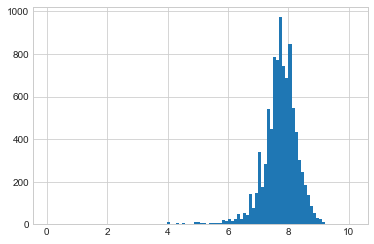

In [160]:
plt.hist(np.log10(gradient_input['sold']),bins=100)

In [161]:
'''

'''


"\nduration_store_test = test_df_X['duration']\ntest_df_X['duration'] = duration_store_test**2\n"

In [162]:
'''
sold_store = gradient_input['sold']
gradient_input['sold'] = np.log10(sold_store)
'''


"\nsold_store = gradient_input['sold']\ngradient_input['sold'] = np.log10(sold_store)\n"

In [163]:
'''
test_sold_store = test_df_X['sold']
test_df_X['sold'] =  np.log10(test_sold_store)
'''


"\ntest_sold_store = test_df_X['sold']\ntest_df_X['sold'] =  np.log10(test_sold_store)\n"